In [2]:
import torch
import pathlib

In [3]:
path_ = pathlib.Path('img')
lista_img = sorted([str(p) for p in path_.glob('*.jpg')])

In [4]:
lista_img

['img\\cat-01.jpg',
 'img\\cat-02.jpg',
 'img\\cat-03.jpg',
 'img\\dog-01.jpg',
 'img\\dog-02.jpg',
 'img\\dog-03.jpg']

In [5]:
import os
from   PIL import Image
import matplotlib.pyplot as plt

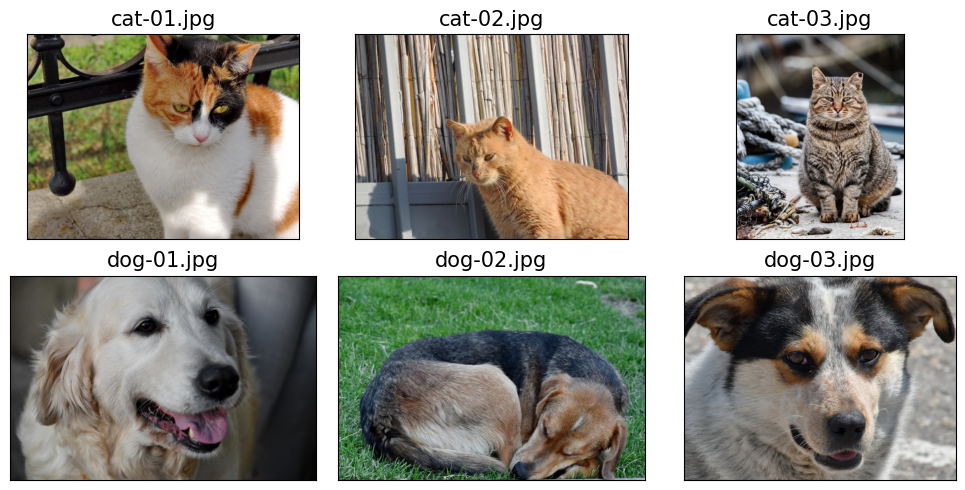

In [6]:
fig = plt.figure(figsize=(10, 5))


for i, arq in enumerate(lista_img):
    img = Image.open(arq)

    ax = fig.add_subplot(2, 3, i+1)

    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(os.path.basename(arq), size=15)

plt.tight_layout()
plt.show()

In [7]:
rotulos = [ 1 if 'dog' in os.path.basename(arq) else 0 \
           for arq in lista_img]

In [8]:
rotulos

[0, 0, 0, 1, 1, 1]

In [9]:

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, path_, labels_):
        self.path_ = path_
        self.labels_ = labels_

    def __getitem__(self, index):
        arq_ = self.path_[index]
        label_ = self.labels_[index]
        return arq_, label_

    def __len__(self):
        return len(self.labels_)

In [10]:
img_dataset = ImageDataset(lista_img, rotulos)

In [11]:
for arq_, label in img_dataset:
    print(arq_, label)

img\cat-01.jpg 0
img\cat-02.jpg 0
img\cat-03.jpg 0
img\dog-01.jpg 1
img\dog-02.jpg 1
img\dog-03.jpg 1


In [12]:
import torchvision

In [36]:
transform = torchvision\
                .transforms.Compose(
                    transforms=[
                        torchvision.transforms.ToTensor(),
                        torchvision.transforms.Resize(size=(80, 120)),
                        torchvision.transforms.RandomAutocontrast(p=0.5)
                    ]
                )

In [37]:
class ImgDataset(torch.utils.data.Dataset):
    def __init__(self, img_path, labels, transform=None):
        self.img_path = img_path
        self.labels   = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.img_path[index])

        if self.transform is not None:
            img = self.transform(img)

        label = self.labels[index]

        return img, label

    def __len__(self):return len(self.labels) 

In [38]:
img_dt = ImgDataset(lista_img, rotulos, transform) 

In [39]:
img_dt.__getitem__(1)[0].numpy().transpose((1, 2, 0))

array([[[0.31190252, 0.29395002, 0.28998768],
        [0.29234755, 0.29492998, 0.31716037],
        [0.3494696 , 0.36407736, 0.391766  ],
        ...,
        [0.5745218 , 0.5381267 , 0.4945633 ],
        [0.61130816, 0.57912445, 0.5156999 ],
        [0.6789114 , 0.64483106, 0.62479436]],

       [[0.29900002, 0.2707675 , 0.2695064 ],
        [0.30465066, 0.3121774 , 0.32598191],
        [0.34463695, 0.35930187, 0.3810904 ],
        ...,
        [0.6463018 , 0.6133398 , 0.58241993],
        [0.60448146, 0.5726489 , 0.5323166 ],
        [0.71637356, 0.68431276, 0.66443914]],

       [[0.29212323, 0.25900954, 0.25936   ],
        [0.32696104, 0.3383018 , 0.3524459 ],
        [0.35312966, 0.36873436, 0.38537675],
        ...,
        [0.6660186 , 0.6360688 , 0.5981598 ],
        [0.566111  , 0.5333708 , 0.5020991 ],
        [0.7302985 , 0.6988816 , 0.6848138 ]],

       ...,

       [[0.66416085, 0.7136343 , 0.70560175],
        [0.6727674 , 0.7228208 , 0.7148696 ],
        [0.6714242 , 0

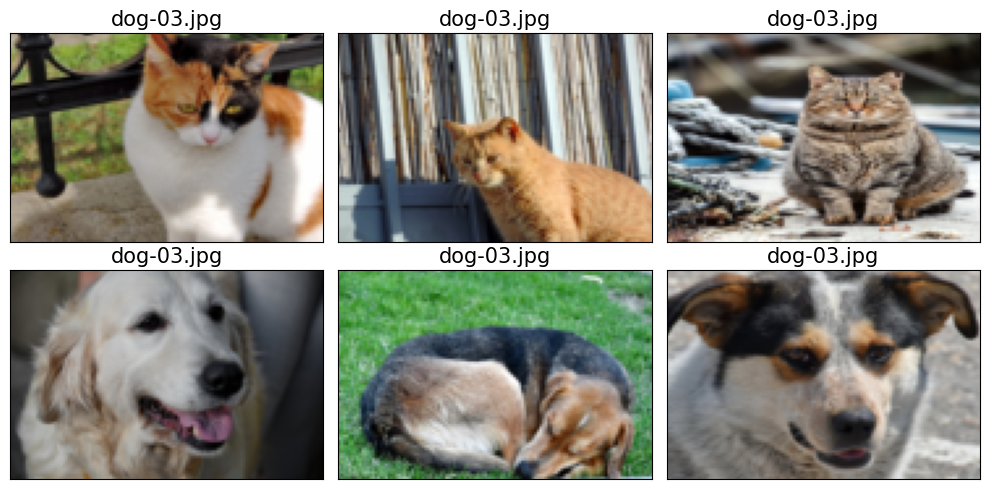

In [40]:
fig = plt.figure(figsize=(10, 5))


for i, img in enumerate(img_dt):

    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(img[0].numpy().transpose((1, 2, 0)))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(os.path.basename(arq), size=15)

plt.tight_layout()
plt.show()